# Analysis of Appointment Data

<h6>Import Necessary Libraries</h6>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h6>Load Data</h6>

In [64]:
df=pd.read_csv('appointments.csv') #read in data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<h6>Exploring Data And Ask Questions</h6>

In [65]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#convert to the correct data types
df['PatientId']=df.PatientId.astype(np.int64).abs()
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [7]:
#checking for nulls
df.isnull().sum() 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#checking for duplicate rows
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
#rename column names - correct spellings and make them more descriptive of what they represent
df.rename(columns={'No-show':'Showed_up?', 'Scholarship':'Sponsorship', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

In [11]:
#A little Note About the Data
#Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, 
#and ‘Yes’ if they did not show up.

def change_value(element):
    '''
    INPUT 
        series - a series holding the target column
        
    OUTPUT
        Series - new series with changed values
    '''
    if element == 'No':
        return 'Y'      # represents yes
    else:
        return 'N'      # represents no

In [15]:
df['Showed_up?']=df['Showed_up?'].apply(change_value)

In [13]:
df[['Sponsorship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']].nunique()

Sponsorship     2
Hypertension    2
Diabetes        2
Alcoholism      2
Handicap        5
SMS_received    2
dtype: int64

In [14]:
df.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [16]:
#the data dictionary explains that the Handicap column should have 2 values (1 and 0)
def correct_value(element):
    '''
    INPUT 
        series - a series holding the Handicap column
        
    OUTPUT
        Series - updated handicap column with correct values
    '''
    if element == 0:
        return 0      
    else:
        return 1      #because all the others are different levels of handicap

In [17]:
df['Handicap']=df['Handicap'].apply(correct_value)

In [18]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up?
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Y
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Y
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Y
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Y
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Y


In [19]:
df['PatientId'].duplicated().sum()  # this shows that some patients booked more than once

48228

In [20]:
df['AppointmentID'].duplicated().sum() #the appointment IDs are unique

0

In [21]:
df.Neighbourhood.nunique()

81

In [32]:
df['appointment_weekday'] = df['AppointmentDay'].dt.dayofweek

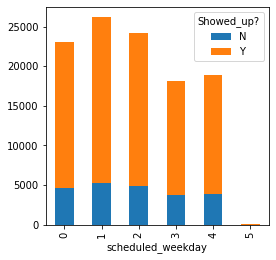

In [60]:
appointment_weekday=pd.crosstab(df.iloc[:,13],df.iloc[:, -1])
appointment_weekday.plot(kind="bar", stacked=True, figsize=(4,4))

In [34]:
df['dateDifference']=df['AppointmentDay']-df['ScheduledDay']
df['dateDifference']=df['dateDifference'].astype('timedelta64[D]')

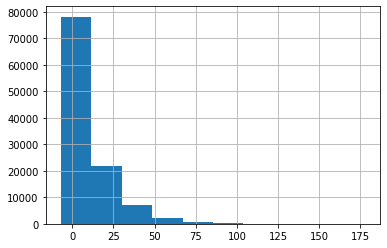

In [39]:
df.dateDifference.hist()

In [41]:
def ordered_date_difference(element):
    if element < 0:
        return "Same Day"
    elif element <=7.0:
        return "1 week"
    elif element >7.0 and element <=14.0:
        return "2 weeks"
    elif element >14.0 and element <=21.0:
        return "3 weeks"
    elif element >21.0 and element <=28.0:
        return "4 weeks"
    else:
        return "> 1 month"

In [35]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Sponsorship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Showed_up?',
       'scheduled_weekday', 'dateDifference'],
      dtype='object')

In [42]:
df['ordereddateDifference']=df['dateDifference'].apply(ordered_date_difference)

C:\Users\37060\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df=df[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Sponsorship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 
       'scheduled_weekday', 'dateDifference', 'ordereddateDifference','Showed_up?']]

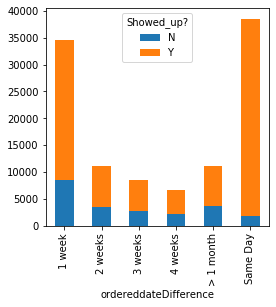

In [59]:
difference=pd.crosstab(df.iloc[:,-2],df.iloc[:, -1]);
difference.plot(kind="bar", stacked=True, figsize=(4,4));

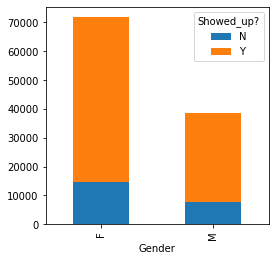

In [22]:
Gender=pd.crosstab(df.iloc[:,2],df.iloc[:, -1])
Gender.plot(kind="bar", stacked=True, figsize=(4,4))

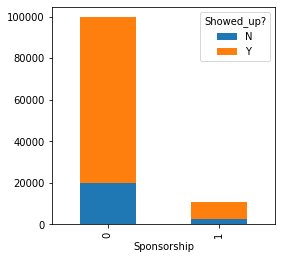

In [23]:
Sponsorship=pd.crosstab(df.iloc[:,7],df.iloc[:, -1])
Sponsorship.plot(kind="bar", stacked=True, figsize=(4,4))

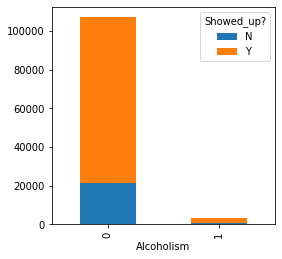

In [24]:
Alcoholism=pd.crosstab(df.iloc[:,10],df.iloc[:, -1])
Alcoholism.plot(kind="bar", stacked=True, figsize=(4,4))

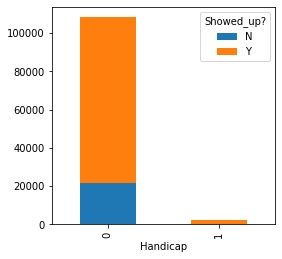

In [25]:
Handicap=pd.crosstab(df.iloc[:,11],df.iloc[:, -1])
Handicap.plot(kind="bar", stacked=True, figsize=(4,4))

In [28]:
df.groupby(['Handicap', 'Showed_up?'])['Gender'].count()

Handicap  Showed_up?
0         N             21912
          Y             86374
1         N               407
          Y              1834
Name: Gender, dtype: int64

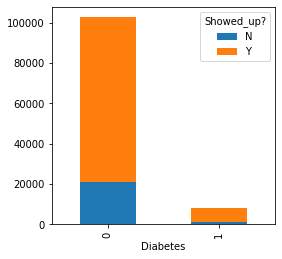

In [29]:
Diabetes=pd.crosstab(df.iloc[:,9],df.iloc[:, -1])
Diabetes.plot(kind="bar", stacked=True, figsize=(4,4))

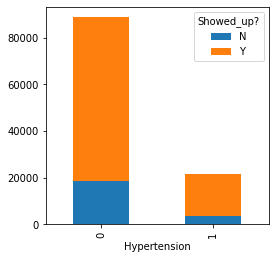

In [30]:
Hypertension=pd.crosstab(df.iloc[:,8],df.iloc[:, -1])
Hypertension.plot(kind="bar", stacked=True, figsize=(4,4))

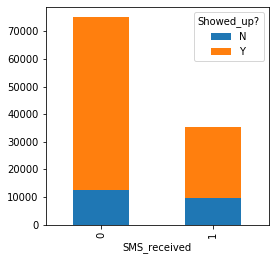

In [31]:
SMS_received=pd.crosstab(df.iloc[:,12],df.iloc[:, -1])
SMS_received.plot(kind="bar", stacked=True, figsize=(4,4))

In [40]:
df.groupby(['SMS_received', 'Showed_up?'])['SMS_received'].count()

SMS_received  Showed_up?
0             N             12535
              Y             62510
1             N              9784
              Y             25698
Name: SMS_received, dtype: int64

In [61]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,scheduled_weekday,dateDifference,ordereddateDifference,Showed_up?
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,4,-1.0,Same Day,Y
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,4,-1.0,Same Day,Y
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,4,-1.0,Same Day,Y
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,4,-1.0,Same Day,Y
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,4,-1.0,Same Day,Y
